In [3]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.utils import np_utils
from google.colab import drive

Using TensorFlow backend.


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
drive.mount('gdrive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at gdrive/


In [ ]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/FeaturesAll.csv')

In [ ]:
df.columns

Index(['File_name', 'emotion', 'emotional intensity', 'statement', 'actor',
       'sex', 'mf0', 'mf1', 'mf2', 'mf3',
       ...
       'peak125', 'peak126', 'peak127', 'peak128', 'peak129', 'Med_Mean.1',
       'Med_Var.1', 'Med_Max.1', 'Med_Min.1', 'Med_Range.1'],
      dtype='object', length=411)

In [ ]:
df=df.dropna()

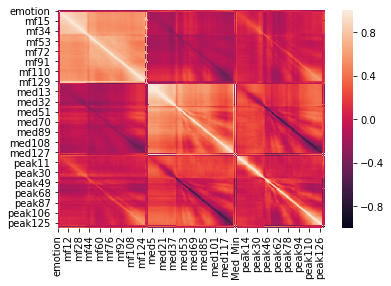

In [ ]:
sns.heatmap(df.corr())

In [ ]:
X=df.drop('File_name',axis=1).drop('emotion',axis=1).drop('statement',axis=1).drop('actor',axis=1).drop('Min',axis=1).drop('Max',axis=1)#.drop('Sentiment',axis=1)

In [ ]:
y=df['emotion']

In [ ]:
X=X.drop('Med_Min',axis=1).drop('Med_Max',axis=1)

In [ ]:
temp=pd.get_dummies(df['sex'])

In [ ]:

X['gender']=temp['Male']

In [ ]:
X=X.drop('sex',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
y_train=y_train.values

In [ ]:
X_train=X_train.values

In [ ]:
X_test=X_test.values

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from keras.models import Sequential

In [ ]:
X.shape

(1438, 403)

In [ ]:
y_train = pd.get_dummies(y_train)

In [ ]:
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation

In [ ]:
model=Sequential()

model.add(Conv1D(128,5,padding='same',input_shape=(403,1)))
model.add(Activation('relu'))
model.add(Conv1D(128,5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128,5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128,5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128,5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Conv1D(128,5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())

model.add(Dense(8,activation='softmax'))
opt=keras.optimizers.rmsprop(lr=0.00005,decay=1e-6)


In [ ]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train.reshape(-1,403,1),y_train,epochs=500,batch_size=5)

W0624 19:52:23.666933 139922463917952 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/500
1294/1294 [==============================] - 8s 6ms/step - loss: 2.1320 - acc: 0.1638
Epoch 2/500
1294/1294 [==============================] - 0s 295us/step - loss: 2.0050 - acc: 0.2202
Epoch 3/500
1294/1294 [==============================] - 0s 288us/step - loss: 1.9459 - acc: 0.2442
Epoch 4/500
1294/1294 [==============================] - 0s 287us/step - loss: 1.8950 - acc: 0.2728
Epoch 5/500
1294/1294 [==============================] - 0s 289us/step - loss: 1.8461 - acc: 0.2844
Epoch 6/500
1294/1294 [==============================] - 0s 284us/step - loss: 1.8229 - acc: 0.2991
Epoch 7/500
1294/1294 [==============================] - 0s 281us/step - loss: 1.8042 - acc: 0.2960
Epoch 8/500
1294/1294 [==============================] - 0s 295us/step - loss: 1.7483 - acc: 0.3207
Epoch 9/500
1294/1294 [==============================] - 0s 282us/step - loss: 1.7439 - acc: 0.3269
Epoch 10/500
1294/1294 [==============================] - 0s 284us/step - loss: 1.7085 - acc: 0.3439
E

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 403, 128)          768       
_________________________________________________________________
activation_7 (Activation)    (None, 403, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 403, 128)          82048     
_________________________________________________________________
activation_8 (Activation)    (None, 403, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 403, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 50, 128)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 50, 128)           82048     
__________

In [ ]:
y1=y_test

In [ ]:
y_test=pd.get_dummies(y_test)

In [ ]:
model.evaluate(x=X_test.reshape(-1,403,1),y=y_test)

144/144 [==============================] - 0s 1ms/step


[3.50095091925727, 0.6180555555555556]

In [ ]:
from keras.models import load_model

In [ ]:
model.save("model.h5")

In [ ]:
model = load_model('model.h5')
# summarize model.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 401, 128)          768       
_________________________________________________________________
activation_1 (Activation)    (None, 401, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 401, 128)          82048     
_________________________________________________________________
activation_2 (Activation)    (None, 401, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 401, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 50, 128)           82048     
__________

In [ ]:
df.head()


,File_name,emotion,statement,actor,sex,mf0,mf1,mf2,mf3,mf4,mf5,mf6,mf7,mf8,mf9,mf10,mf11,mf12,mf13,mf14,mf15,mf16,mf17,mf18,mf19,mf20,mf21,mf22,mf23,mf24,mf25,mf26,mf27,mf28,mf29,mf30,mf31,mf32,mf33,mf34,...,peak97,peak98,peak99,peak100,peak101,peak102,peak103,peak104,peak105,peak106,peak107,peak108,peak109,peak110,peak111,peak112,peak113,peak114,peak115,peak116,peak117,peak118,peak119,peak120,peak121,peak122,peak123,peak124,peak125,peak126,peak127,peak128,peak129,Peak_Mean,Peak_Var,Peak_Max,Peak_Min,Peak_Range,E.I.,Sentiment
0,03-01-01-01-01-01-01.wav,1,1,1,Male,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.341104,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.342924,0.336113,0.309033,0.299561,0.295565,...,73.241814,74.301277,74.738510,75.129234,76.354797,77.815559,78.579895,79.084053,79.485176,79.506706,79.459389,79.440697,79.738991,79.715919,79.814957,79.756958,79.762909,79.911583,79.976074,79.975212,79.904663,79.950844,79.949120,79.915268,79.925880,79.895500,79.851753,79.851204,79.909264,79.983932,79.984482,79.971191,79.934845,70.770405,111.595938,80.0,47.105057,32.894943,1,0.0
1,03-01-01-01-01-02-01.wav,1,1,1,Male,0.345956,0.345956,0.345956,0.345956,0.322586,0.313517,0.334316,0.322830,0.315307,0.322695,0.320683,0.312307,0.307765,0.310604,0.287174,0.297520,0.326609,0.339801,0.329402,0.323320,0.329350,0.310350,0.313574,0.307667,0.316555,0.344335,0.345956,0.333028,0.303508,0.307324,0.329595,0.338577,0.311346,0.303208,0.290657,...,71.080704,72.282959,72.989914,72.767212,72.576706,73.514923,74.661613,75.990326,77.591721,78.435051,78.750603,78.767090,78.805862,79.022194,79.126183,79.359055,79.480309,79.479179,79.325272,79.569412,79.825432,79.817596,79.902718,79.954803,79.896187,79.886589,79.984390,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,69.979664,121.132561,80.0,45.602539,34.397461,1,0.0
2,03-01-01-01-02-01-01.wav,1,2,1,Male,0.296179,0.287216,0.271472,0.285210,0.297537,0.292036,0.296292,0.286695,0.299698,0.312413,0.304356,0.330388,0.339283,0.342449,0.336630,0.307761,0.297293,0.315876,0.342118,0.338645,0.338253,0.339419,0.342449,0.342449,0.342449,0.340556,0.341384,0.342449,0.342236,0.342449,0.339437,0.334901,0.317610,0.320333,0.334623,...,73.162560,73.399307,74.066216,74.679710,75.944740,77.445061,78.512695,78.848289,79.131363,79.271492,79.464577,79.598122,79.588402,79.747726,79.777817,79.759979,79.832092,79.940132,79.952042,79.862686,79.955231,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,71.019198,121.994501,80.0,44.769817,35.230183,1,0.0
3,03-01-01-01-02-02-01.wav,1,2,1,Male,0.306829,0.312059,0.310042,0.303921,0.312275,0.301362,0.311407,0.307854,0.299451,0.313133,0.306749,0.301199,0.299416,0.303193,0.309639,0.305081,0.328693,0.327714,0.336512,0.338495,0.338495,0.338495,0.338495,0.338495,0.338495,0.338495,0.338495,0.338495,0.338495,0.338495,0.338495,0.338495,0.331469,0.320327,0.336959,...,74.023537,75.791695,77.242973,77.768127,78.292824,78.427200,78.234360,78.446419,78.767197,79.030510,79.224617,79.607391,79.509361,79.547539,79.561058,79.855423,79.927597,79.890900,79.894867,79.922897,79.876785,79.906494,79.999474,79.993279,79.994667,80.000000,79.954010,79.902588,79.858337,79.901939,79.963547,79.966904,79.879959,70.968469,132.856090,80.0,44.241814,35.758186,1,0.0
4,03-01-02-01-01-01-01.wav,2,1,1,Male,0.330859,0.311734,0.303332,0.322367,0.327429,0.328976,0.348300,0.344684,0.352727,0.345652,0.360998,0.362814,0.362814,0.353086,0.362650,0.362814,0.362814,0.362814,0.362814,0.362814,0.362814,0.362814,0.362814,0.362814,0.362814,0.362814,0.362814,0.362814,0.362196,0.362814,0.362814,0.354433,0.336860,0.351452,0.347790,...,67.751923,58.610626,57.278652,61.870651,64.977654,66.637085,68.296967,69.074570,69.352837,69.508736,70.113617,71.104073,71.679771,71.741455,71.853951,72.22